# Data Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

In [128]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [129]:
d1 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_1/On_Time_On_Time_Performance_2017_1.csv', low_memory=False)
d2 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_2/On_Time_On_Time_Performance_2017_2.csv', low_memory=False)
d3 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_3/On_Time_On_Time_Performance_2017_3.csv', low_memory=False)
d4 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_4/On_Time_On_Time_Performance_2017_4.csv', low_memory=False)
d5 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_5/On_Time_On_Time_Performance_2017_5.csv', low_memory=False)
d6 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_6/On_Time_On_Time_Performance_2017_6.csv', low_memory=False)
d7 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_7/On_Time_On_Time_Performance_2017_7.csv', low_memory=False)
d8 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_8/On_Time_On_Time_Performance_2017_8.csv', low_memory=False)
d9 = pd.read_csv(cur_path+'/On_Time_On_Time_Performance_2017_9/On_Time_On_Time_Performance_2017_9.csv', low_memory=False)

In [130]:
df = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9])  

In [131]:
df.head()
del df['Unnamed: 109']

In [132]:
df.shape

(4276457, 109)

In [133]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]

In [134]:
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(df.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(df.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

#plt.show()

In [135]:
df[['ArrDel15','DepDel15']].isnull().sum()

ArrDel15    82860
DepDel15    70672
dtype: int64

In [136]:
df['Cancelled'].unique()

array([ 0.,  1.])

In [137]:
df['Flight_Status'] = np.where(df['ArrDel15']==1.0,1,0)
df['Flight_Status'] = np.where(df['DepDel15']==1.0,1,0)
df.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
df['Flight_Status'] = df['Flight_Status'].astype(int)
df['Status'] = np.where(df['Flight_Status']==1,'Delayed','On Time')

Status
Delayed     877417
On Time    3399040
Name: Status, dtype: int64


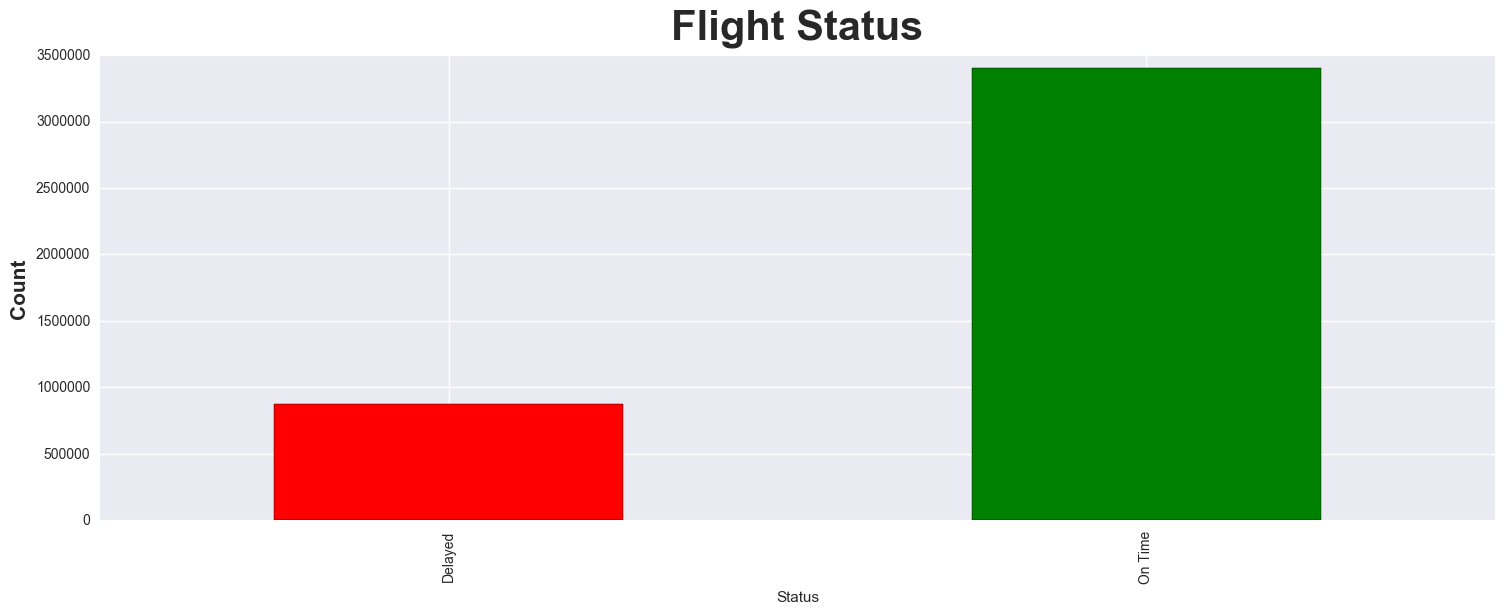

In [141]:
plt.rc("figure", figsize=(18, 6))
c = df.groupby('Status')
c['Status'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Flight Status',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()

Status
Delayed     877417
On Time    3399040
Name: Status, dtype: int64


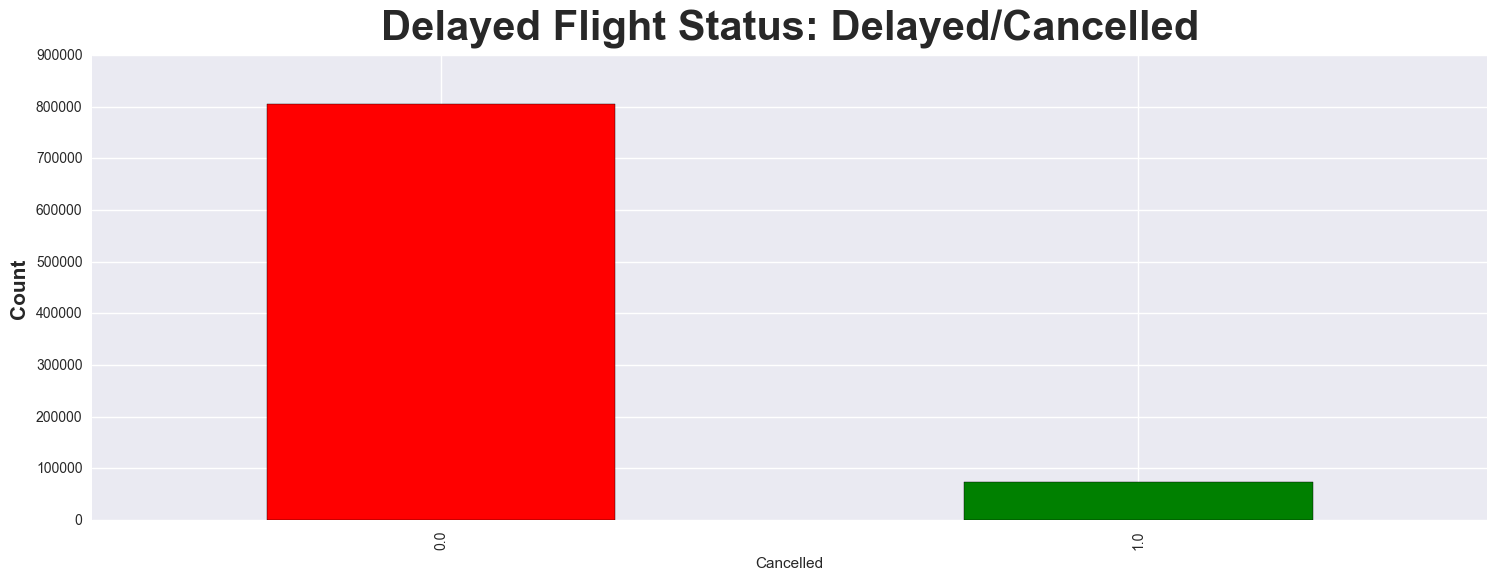

In [139]:
s = df[df['Status']=='Delayed'].groupby("Cancelled")
s['Cancelled'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Delayed Flight Status: Delayed/Cancelled',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()

In [164]:
days = {1:'Monday',2:'Tuesday',3:'Wedsday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

df['day'] = df['DayOfWeek'].apply(lambda x: days[x])

In [156]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Flight_Status,Status,day,index
0,2017,1,1,17,2,2017-01-17,AA,19805,AA,N583AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Tuesday,1
1,2017,1,1,18,3,2017-01-18,AA,19805,AA,N544AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Wedsday,2
2,2017,1,1,19,4,2017-01-19,AA,19805,AA,N553AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Thursday,3
3,2017,1,1,20,5,2017-01-20,AA,19805,AA,N191AA,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Delayed,Friday,4
4,2017,1,1,21,6,2017-01-21,AA,19805,AA,N170AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Satday,5
5,2017,1,1,22,7,2017-01-22,AA,19805,AA,N179AA,...,NaN,NaN,NaN,NaN,NaN,NaN,1,Delayed,Sunday,6
6,2017,1,1,23,1,2017-01-23,AA,19805,AA,N579AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Monday,7
7,2017,1,1,24,2,2017-01-24,AA,19805,AA,N583AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Tuesday,8
8,2017,1,1,25,3,2017-01-25,AA,19805,AA,N167AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Wedsday,9
9,2017,1,1,26,4,2017-01-26,AA,19805,AA,N551AA,...,NaN,NaN,NaN,NaN,NaN,NaN,0,On Time,Thursday,10


In [120]:
df = df.reset_index()
df['index'] = df.index +1
df=df.rename(columns = {'index':'id'})
df= df.set_index('id')

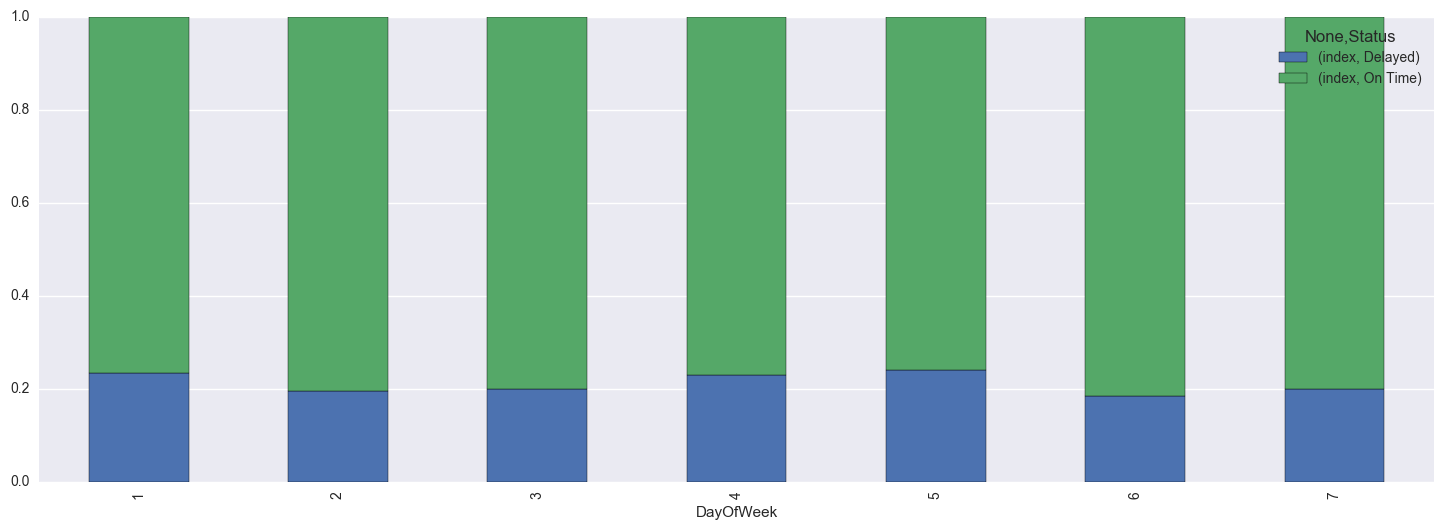

index          
Status      Delayed   On Time
DayOfWeek                    
1          0.232469  0.767531
2          0.195562  0.804438
3          0.199784  0.800216
4          0.229509  0.770491
5          0.239105  0.760895
6          0.183843  0.816157
7          0.200158  0.799842

In [171]:
tps = df.pivot_table(values=['index'], index='DayOfWeek',columns='Status',aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
plt.show()
tps

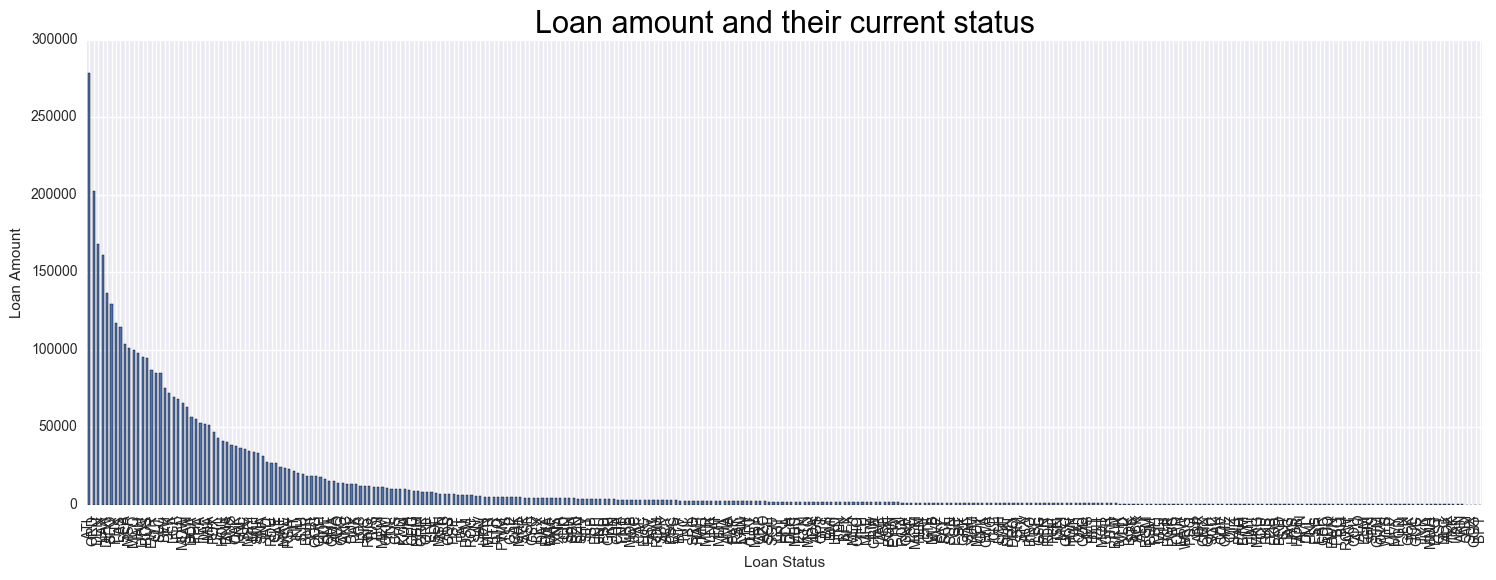

In [189]:
df.groupby('Dest')['index'].count().sort_values(ascending=0).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan amount and their current status',size=22,color="black")
plt.show()

In [193]:
#df['Dest'].value_counts().to_frame().reset_index('Count')
df.groupby('Dest')['index].count()

SyntaxError: EOL while scanning string literal (<ipython-input-193-195ef5f53db0>, line 2)

In [202]:
df[['index','Dest']].groupby("Dest").count().reset_index().sort('index', ascending = False)[:10]

,Dest,index
20,ATL,278211
222,ORD,202268
80,DEN,168366
170,LAX,161128
81,DFW,136477
272,SFO,129647
234,PHX,117199
168,LAS,114332
271,SEA,103586
210,MSP,101138
